In [1]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_table('checkins.dat', sep='|', low_memory=False)

In [7]:
data.columns

Index(['   id    ', ' user_id ', ' venue_id ', '     latitude      ',
       '     longitude     ', '     created_at      '],
      dtype='object')

In [34]:
latitude = data['     latitude      '].apply(lambda x: float(x) if x != '                   ' else np.NaN).dropna()
longitude = data['     longitude     '].apply(lambda x: float(x) if x != '                   ' else np.NaN).dropna()

In [41]:
latitude.index = list(range(0, latitude.shape[0]))
longitude.index = list(range(0, longitude.shape[0]))

In [47]:
data = pd.concat([latitude, longitude], axis=1)
data.shape

(396634, 2)

In [50]:
new_data = data.loc[0:100000-1, :]
new_data.shape

(100000, 2)

In [51]:
from sklearn.cluster import MeanShift

In [58]:
%%time
model = MeanShift(bandwidth=0.1)
predict = model.fit_predict(new_data)

CPU times: user 2min 34s, sys: 1.41 s, total: 2min 35s
Wall time: 2min 36s


In [73]:
t = {i: 0 for i in set(predict)}
for i in predict:
    t[i] += 1
d = {}
for i, j in t.items():
    if j > 15:
        d[i] = j

In [74]:
offices_coordinates = [
    [33.751277, -118.188740],
    [25.867736, -80.324116],
    [51.503016, -0.075479],
    [52.378894, 4.885084],
    [39.366487, 117.036146],
    [-33.868457, 151.205134]
]

In [76]:
centers = [model.cluster_centers_[i] for i in d.keys()]

592

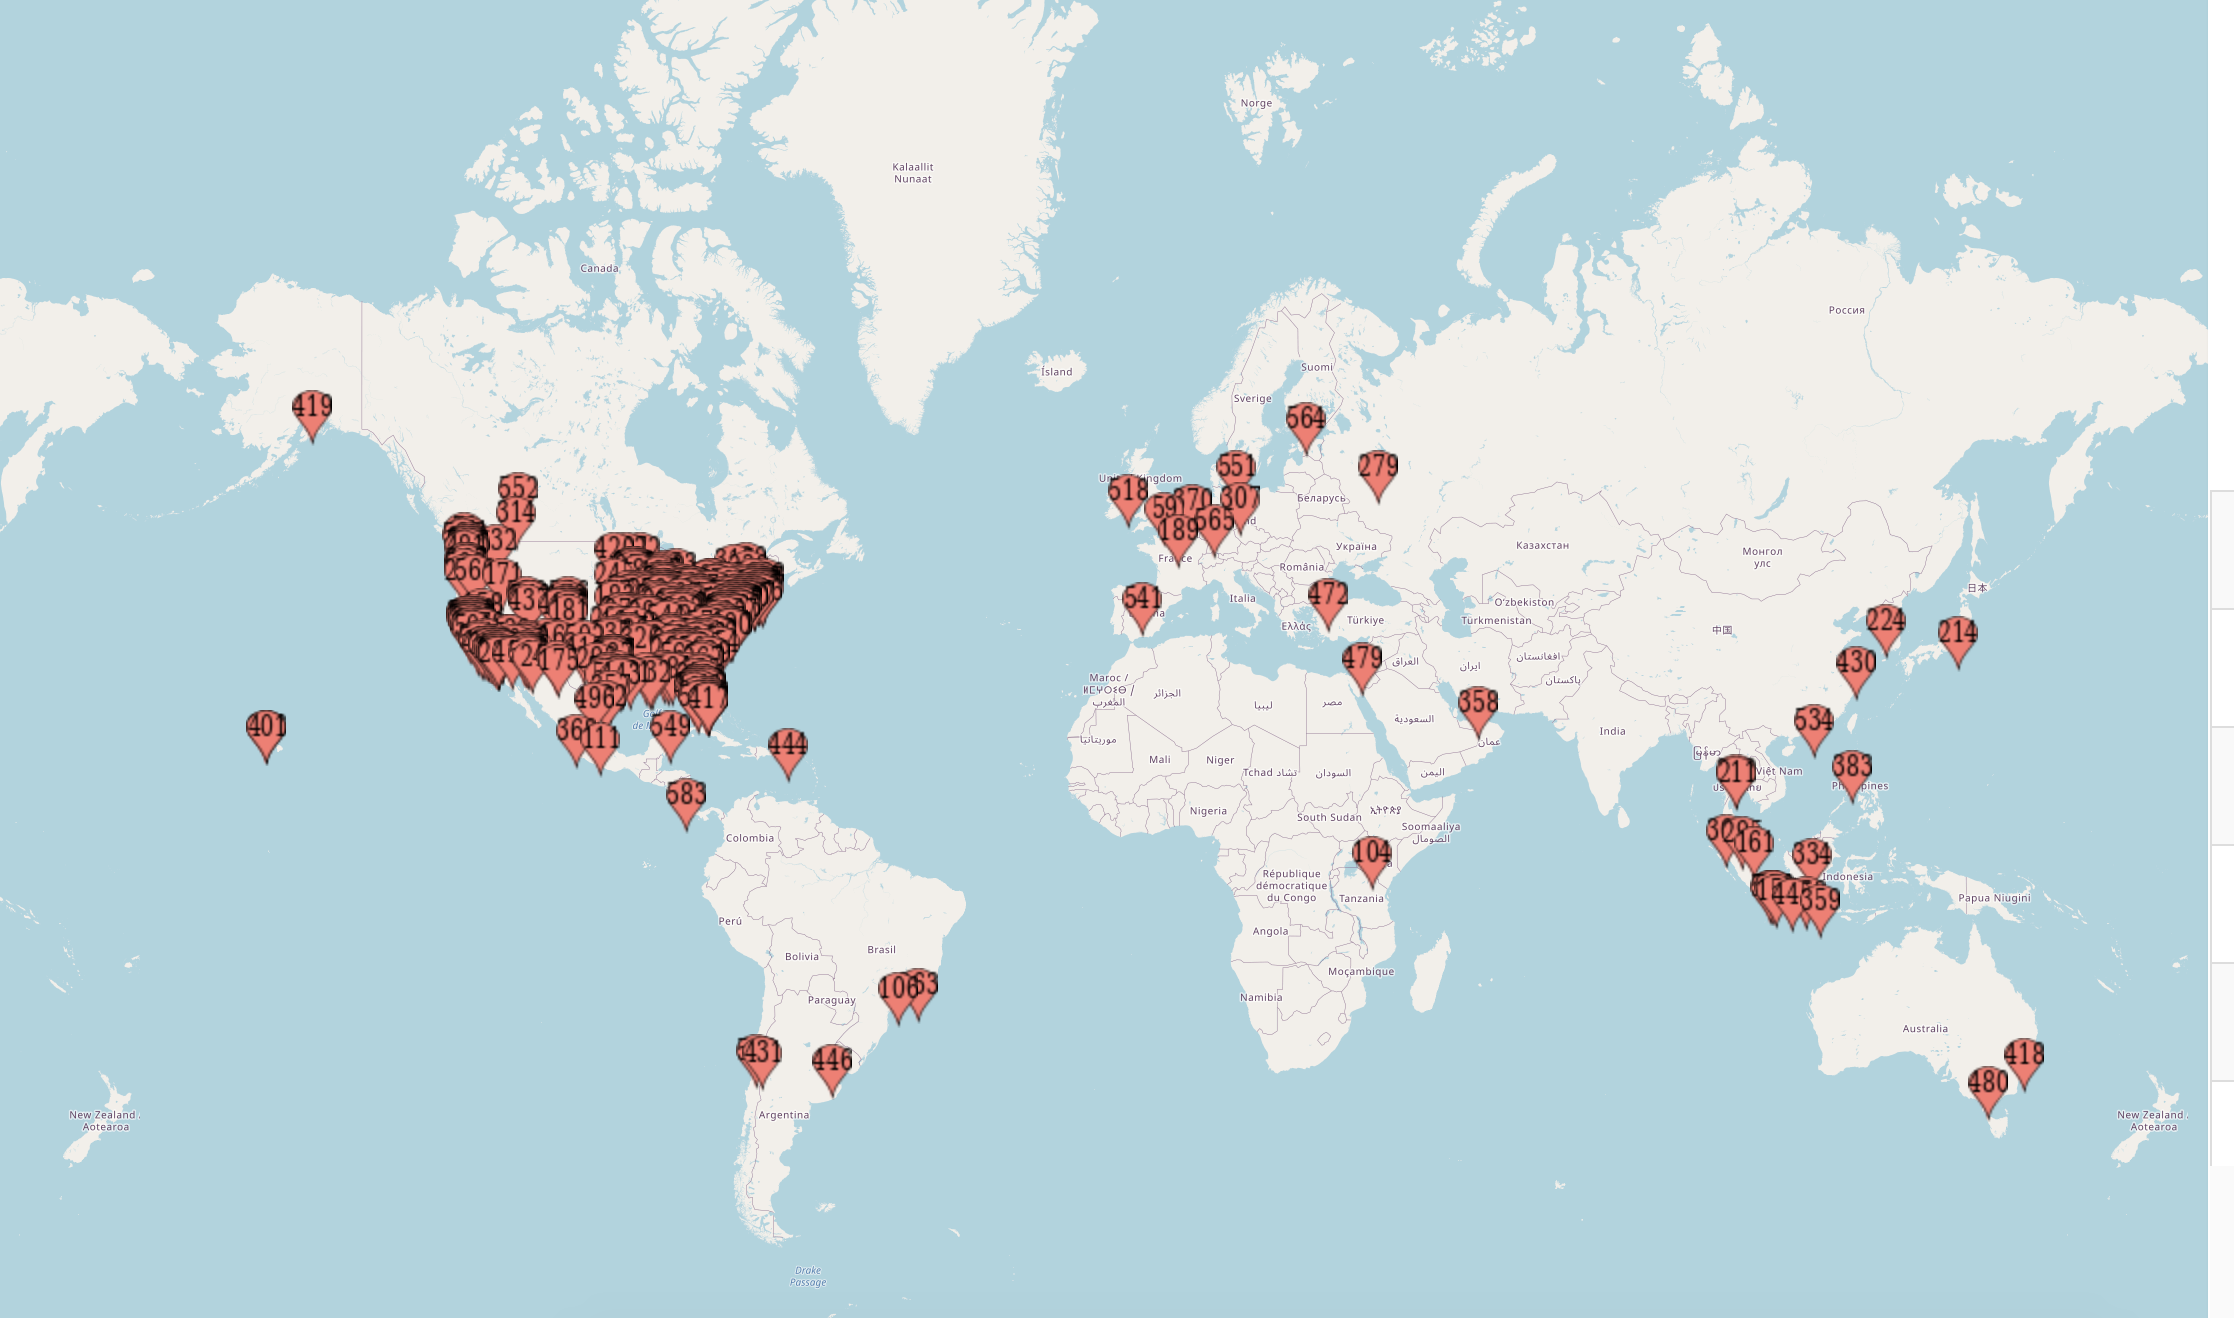

In [85]:
with open('f', 'w') as f:
    s = ''
    for i in centers:
        s += str(i[0]) + ',' + str(i[1]) + '\n'
    f.write(s)

from IPython.display import Image
Image(filename='centers_of_clusters.png') 

In [111]:
from scipy.spatial import distance
mins = []
for j in range(6):
    mins.append(sorted([(distance.euclidean(i, offices_coordinates[j]), i) for i in centers], key=
                      lambda k: k[0])[:20])

m = np.Infinity
c = ()
for i in mins:
    for j in i:
        if j[0] < m:
            m = j[0]
            c = j[1]
print(c)
with open('ans.txt', 'w') as f:
    f.write(str(c[0]) + ' ' + str(c[1]))

[-33.86063043 151.20477593]
